# Harris Corner Detection


# Algorithm 
Harris Corner Detection Algorithm <br>
1.  Apply gaussian filter and compute x and y derivatives of image <br>
![1st](Images/1.png)<br>
2.  Compute products of derivatives at every pixel<br>
![1st](Images/2.png)<br>
3.  Compute the sums of the products of derivatives at each pixel<br>
![1st](Images/3.png)<br>
4. Define at each pixel (x,y) the matrix<br>
![1st](Images/4.png)<br>
5. Compute the response of the detector at each pixel <br>
![1st](Images/5.png)<br>

6. Threshold on value of R. Compute nonmax suppression<br>


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imsave, imread,imshow
import cv2
from harrisdetector import *


Image shape (240, 240, 3)


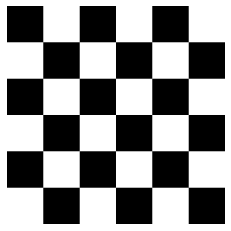

In [3]:
img=cv2.imread('Images/img.jpg')
print("Image shape",img.shape)
m, n,ch= img.shape
plt.imshow(img[...,::-1])
plt.axis('off')  # Turn of axis numbers and ticks
plt.show()

Lets first do Harris using opencv.

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)



**img** - Input image, it should be grayscale and float32 type. <br>
**blockSize** - It is the size of neighbourhood considered for corner detection <br>
**ksize** - Aperture parameter of Sobel derivative used.<br>
**k** - Harris detector free parameter in the equation.<br>



In [5]:
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
img2=img.copy()
# Threshold for an optimal value, it may vary depending on the image.
img2[dst>0.01*dst.max()]=[255,0,0]

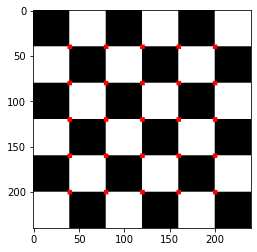

In [6]:
plt.imshow(img2)

# Excercise one

1. Implement Harris corner detection using numpy. We start first with basic implementation of Harris corner detection. As described in the class Having to compute eigenvalues is computationally expensive


Starting Code

For this example, we will use opencv function soble

In [7]:

# Step 1
gx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)



In [8]:
# Step 2
Ix2=gx**2
Iy2=gy**2
Ixy=gx*gy

In [9]:
#Step3
Ix2 = cv2.GaussianBlur(Ix2,(3,3),cv2.BORDER_DEFAULT)
Iy2 = cv2.GaussianBlur(Iy2,(3,3),cv2.BORDER_DEFAULT)
Ixy = cv2.GaussianBlur(Ixy,(3,3),cv2.BORDER_DEFAULT)

In [10]:
#Step 4 and 5
DetH=Ix2*Iy2-Ixy*Ixy
TraceH = Ix2 + Iy2
R=DetH - TraceH

In [11]:
#Step 6: threshold
MaxResp = 0.25
img[R > MaxResp*R.max()] = [255,0,0]

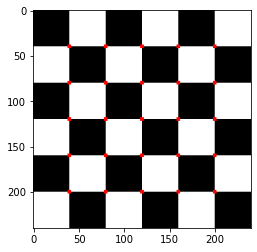

In [12]:
plt.imshow(img)

2. EXTRA: For this exercise, Implement Harris corner detection using eigenvalues. <br> 
a. Compare performance of the two methods (time complexity).<br>
b. Apply both methods on (Images/img2.jpg) and compare the number of Harris point detected. Show the heatplot for each image. 

